In [2]:
dataset_root = "/Users/tianyang/DATASET/" # change to your own repo
dir_modelnet_10 = dataset_root + "modelnet10_hdf5_2048"
dir_modelnet_40 = dataset_root + "modelnet40_hdf5_2048"
dir_shapenet_part = dataset_root + "shapenetpart_hdf5_2048"
dir_shapenet_core = dataset_root + "shapenetcorev2_hdf5_2048"

# modelnet 10

In [3]:
import os
os.listdir(dir_modelnet_10)

['train_files.txt',
 'test0.h5',
 'train0_id2name.json',
 'test_files.txt',
 'train0_id2file.json',
 'train1_id2name.json',
 'test0_id2file.json',
 'train1_id2file.json',
 'test0_id2name.json',
 'train1.h5',
 'shape_names.txt',
 'train0.h5']

### Dataset sizes

In [4]:
import h5py
f_test0 = h5py.File(dir_modelnet_10 + "/test0.h5", 'r')
f_train0 = h5py.File(dir_modelnet_10 + "/train0.h5", 'r')
f_train1 = h5py.File(dir_modelnet_10 + "/train1.h5", 'r')
list(f_train0.keys())

['data', 'label']

In [5]:
# 908 shapes * (2048 points of 3 coordinates)
print("test0 : ",f_test0["data"].shape, f_test0["label"].shape)
print("train0 : ",f_train0["data"].shape, f_train0["label"].shape)
print("train1 : ",f_train1["data"].shape, f_train1["label"].shape)

test0 :  (908, 2048, 3) (908, 1)
train0 :  (2048, 2048, 3) (2048, 1)
train1 :  (1943, 2048, 3) (1943, 1)


In [6]:
import json
with open(dir_modelnet_10 +  '/train0_id2file.json') as f:
    id_file_train0 = json.load(f)
with open(dir_modelnet_10 +  '/train0_id2name.json',) as f:
    id_name_train0 = json.load(f)
len(id_name_train0) # same length as train0["label"]

2048

In [7]:
# check correspondance
[(id_name_train0[i], f_train0["label"][i].item()) for i in range(5)]

[('table', 8), ('monitor', 5), ('chair', 2), ('bed', 1), ('table', 8)]

# shapenet core v2


In [8]:
os.listdir(dir_shapenet_core)

['train7.h5',
 'train8_id2file.json',
 'train3.h5',
 'train8_id2name.json',
 'train2.h5',
 'train9_id2file.json',
 'train6.h5',
 'train9_id2name.json',
 'test5.h5',
 'test5_id2file.json',
 'test2_id2file.json',
 'val1.h5',
 'train12_id2file.json',
 'train3_id2name.json',
 'train14.h5',
 'train15_id2file.json',
 'train4_id2name.json',
 'test2_id2name.json',
 'train_files.txt',
 'test5_id2name.json',
 'train9.h5',
 'train4_id2file.json',
 'train15_id2name.json',
 'test1.h5',
 'train3_id2file.json',
 'train12_id2name.json',
 'train10.h5',
 'test3_id2file.json',
 'train8.h5',
 'test4_id2file.json',
 'train5_id2name.json',
 'train14_id2file.json',
 'test0.h5',
 'train2_id2name.json',
 'train13_id2file.json',
 'val2_id2name.json',
 'train11.h5',
 'val2_id2file.json',
 'test4.h5',
 'test4_id2name.json',
 'test3_id2name.json',
 'val0.h5',
 'train13_id2name.json',
 'train15.h5',
 'train2_id2file.json',
 'train14_id2name.json',
 'train5_id2file.json',
 'train11_id2file.json',
 'train0_id2name.js

In [9]:
import h5py
f_test0 = h5py.File(dir_shapenet_core + "/test0.h5", 'r')
f_train0 = h5py.File(dir_shapenet_core + "/train0.h5", 'r')
list(f_train0.keys())

['data', 'label']

In [10]:
f_train0["data"].shape, f_train0["label"].shape

((2048, 2048, 3), (2048, 1))

In [11]:
# same structure as modelnet10


# Visualization with Mitsuba (with rendering thus very slow)

datasize: 35708
torch.Size([2048, 3]) torch.FloatTensor torch.Size([1]) torch.LongTensor cellphone


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


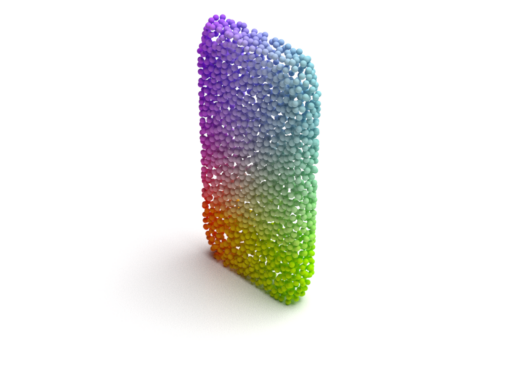

In [12]:
import mitsuba as mi
from utils.mitsuba3_visualize import mitsuba
import matplotlib.pyplot as plt
item = 0
split = 'train'
dataset_name = 'shapenetcorev2'
root = dataset_root
save_root = os.path.join(root, "image", dataset_name)
if not os.path.exists(save_root):
    os.makedirs(save_root)

from utils.dataset import Dataset
d = Dataset(root=root, dataset_name=dataset_name,
                num_points=2048, split=split, random_rotate=False, load_name=True)
print("datasize:", d.__len__())

# print(d[item]) # tianyang
pts, label, name, file = d[item]
print(pts.size(), pts.type(), label.size(), label.type(), name)
path = os.path.join(save_root, dataset_name + '_' + split + str(item) + '_' + str(name) + '.xml')
mitsuba(pts.numpy(), path)

# added by tianyang
mi.set_variant("llvm_ad_rgb")
scene = mi.load_file(path)
image = mi.render(scene, spp=256)
plt.axis("off")
plt.imshow(image ** (1.0 / 2.2))  # approximate sRGB tonemapping
# plt.savefig(str(name) + ".jpg")